In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
traffic_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [139]:
traffic_df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


### Description of the column categories 
- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: numeric amount in mm of rain that occured in the hour
- snow_1h: numeric amount in mm of snow that occurred in the hour 
- clouds_all: numeric percentage of cloud cover
- weather_main: categorical short textual description of the current weather
- weather_description: categorical longer textual description of the current weather
- date_time: DateTime hour of the data collected in local CST Time 
- traffic_volume:  Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [140]:
# replace holiday with numeric values to represent a holiday = 1 and non-holiday = 0
traffic_df["holiday"] = traffic_df["holiday"].replace('None', 0)
traffic_df["holiday"] = traffic_df["holiday"].replace("Columbus Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Veterans Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Thanksgiving Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Christmas Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("New Years Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Washingtons Birthday", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Memorial Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Independence Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Labor Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Martin Luther King Jr Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("State Fair", 1)

In [141]:
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


(array([  10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   99.,  936., 2205., 3324., 6422., 8120.,
        5700., 8685., 8835., 3583.,  285.]),
 array([  0.    ,   6.2014,  12.4028,  18.6042,  24.8056,  31.007 ,
         37.2084,  43.4098,  49.6112,  55.8126,  62.014 ,  68.2154,
         74.4168,  80.6182,  86.8196,  93.021 ,  99.2224, 105.4238,
        111.6252, 117.8266, 124.028 , 130.2294, 136.4308, 142.6322,
        148.8336, 155.035 , 161.2364, 167.4378, 173.6392, 179.8406,
        186.042 , 192.2434, 198.4448, 204.6462, 210.8476, 217.049 ,
        223.2504, 229.4518, 235.6532, 241.8546, 248.056 , 254.2574,
        260.4588, 266.6602, 272.8616, 279.063 , 285.2644, 291.4658,
        297.6672, 303.8686, 310.07  ]),
 <a list of 50 P

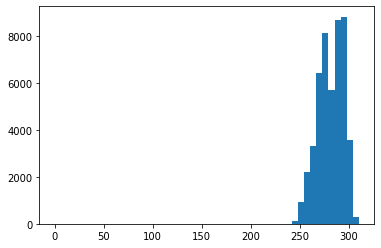

In [142]:
plt.hist(traffic_df["temp"], bins = 50)

In [143]:
print(traffic_df["temp"][0])

288.28


In [144]:
def to_farenheit(X): 
    F_x = X - 273.15
    F_x = ((9/5) * (F_x)) + 32.0
    
    return float(F_x)

In [145]:
# Removing 0 Kelvin values
traffic_df = traffic_df[traffic_df['temp'] > 0]
traffic_df["temp"] = traffic_df['temp'].apply(to_farenheit)

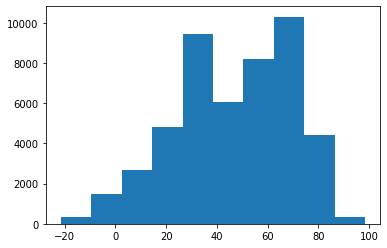

In [146]:
plt.hist(traffic_df['temp'])
plt.show()

In [147]:
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


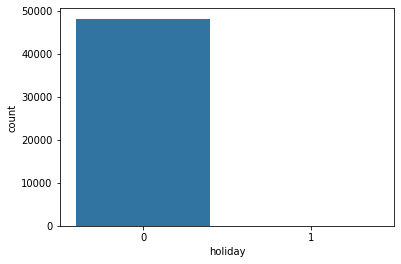

In [148]:
sns.countplot(traffic_df['holiday'])

In [149]:
rainy_df = traffic_df[traffic_df['rain_1h'] > 0]

In [150]:
rainy_df["rain_1h"].describe()

count    3467.000000
mean        4.647494
std       166.970323
min         0.250000
25%         0.250000
50%         0.640000
75%         1.780000
max      9831.300000
Name: rain_1h, dtype: float64

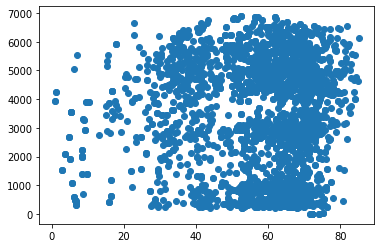

In [151]:
#scatterplot of the temperature of rainy day (rain >= .25mm) and the traffic volume
plt.scatter(rainy_df['temp'], rainy_df['traffic_volume'])

In [152]:
snowy_df = traffic_df[traffic_df['snow_1h'] > 0]

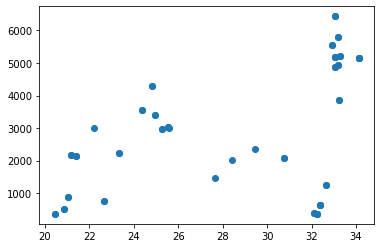

In [153]:
#scatterplot of the temperature of a snow day (snow fall > 0) and the traffic volume
plt.scatter(snowy_df['temp'], snowy_df['traffic_volume'])

In [154]:
traffic_df.corr()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume
holiday,1.000000,-0.008258,-0.000216,-0.000969,-0.005620,-0.042911
temp,-0.008258,1.000000,0.009484,-0.020860,-0.112859,0.132291
rain_1h,-0.000216,0.009484,1.000000,-0.000090,0.004817,0.004713
snow_1h,-0.000969,-0.020860,-0.000090,1.000000,0.027928,0.000728
clouds_all,-0.005620,-0.112859,0.004817,0.027928,1.000000,0.066819
traffic_volume,-0.042911,0.132291,0.004713,0.000728,0.066819,1.000000


In [156]:
traffic_df["temp"].min()

-21.567999999999984

59.233999999999995